# <center> Elementy numerycznej algebry liniowej </center>

Rozwiązywanie układów równań liniowych jest jednym z podstawowych problemów metod numerycznych. Układy równań liniowych występują w wielu dziedzinach nauki i inżynierii. Stosuje się też w uczeniu maszynowym np. podczas regresji z błędem średniokwadratowym. 


Istnieje kilka metod rozwiązywania układów równań. Na dzisiejszych zajęciach zajmiemy się:
* eliminacją Gaussa bez oraz z wyborem elementu głównego,
* metodami iteracyjnymi.

Problem rozwiązywania układu równań liniowych będzie nam towarzyszły do końca zajęć z tego przedmiotu.

## Normy i wskaźniki uwarunkowania

Wrażliwość układu (zmiana rozwiązania) na niewielkie zaburzenia wektora `b` zależy od macierzy `A` i ocenia się ja za pomocą tzw. współczynnika lub [wskaźnika uwarunkowania macierzy](https://pl.wikipedia.org/wiki/Wskaźnik_uwarunkowania) (ang. *condition number*). Im wyższa wartość tego wskaźnika. tym macierz jest gorzej uwarunkowana. Wskaźnik uwarunkowania to iloczyn normy macierzy z normą jej odwrotności.

$$cond(A)=|A|_{p}\cdot|A^{-1}|_{p}$$
gdzie *p* oznacza jedną z norm macierzy.

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

***Zadanie 1.***

Porównaj normy 1,2, $\infty$ następujących macierzy:
* [Hilberta](https://pl.wikipedia.org/wiki/Macierz_Hilberta): o wymiarach 5x5 i 15x15
* [Vandermonde'a](https://pl.wikipedia.org/wiki/Macierz_Vandermonde’a): o wymiarach 5x5 i 15x15
* losowej o wartościach z przedziału [0,1]:  o wymiarach 5x5 i 15x15
* $P=\left[\begin{array}{cccc}4 & 1 & -1 & 0 \\ 1 & 3 & -1 & 0 \\ -1 & -1 & 5 & 2 \\ 0 & 0 & 2 & 4\end{array}\right]$

Czy wśród powyższych macierzy jest macierz [diagonalnie dominująca](https://pl.wikipedia.org/wiki/Macierz_przekątniowo_dominująca)?


In [14]:
import numpy as np

# Macierz Hilberta
H_5 = np.array([[1 / (i + j + 1) for j in range(5)] for i in range(5)])
H_15 = np.array([[1 / (i + j + 1) for j in range(15)] for i in range(15)])

# Macierz Vandermonde'a
V_5 = np.array([[i**j for j in range(5)] for i in range(1, 6)])
V_15 = np.array([[i**j for j in range(15)] for i in range(1, 16)])

# Losowa macierz
R_5 = np.random.rand(5, 5)
R_15 = np.random.rand(15, 15)

# Macierz P
P = np.array([[4, 1, -1, 0], [1, 3, -1, 0], [-1, -1, 5, 2], [0, 0, 2, 4]])


# Obliczenie norm macierzy
norm_H_5_1 = np.linalg.norm(H_5, ord=1)
norm_H_5_2 = np.linalg.norm(H_5, ord=2)
norm_H_5_inf = np.linalg.norm(H_5, ord=np.inf)

norm_H_15_1 = np.linalg.norm(H_15, ord=1)
norm_H_15_2 = np.linalg.norm(H_15, ord=2)
norm_H_15_inf = np.linalg.norm(H_15, ord=np.inf)

norm_V_5_1 = np.linalg.norm(V_5, ord=1)
norm_V_5_2 = np.linalg.norm(V_5, ord=2)
norm_V_5_inf = np.linalg.norm(V_5, ord=np.inf)

norm_V_15_1 = np.linalg.norm(V_15, ord=1)
norm_V_15_2 = np.linalg.norm(V_15, ord=2)
norm_V_15_inf = np.linalg.norm(V_15, ord=np.inf)

norm_R_5_1 = np.linalg.norm(R_5, ord=1)
norm_R_5_2 = np.linalg.norm(R_5, ord=2)
norm_R_5_inf = np.linalg.norm(R_5, ord=np.inf)

norm_R_15_1 = np.linalg.norm(R_15, ord=1)
norm_R_15_2 = np.linalg.norm(R_15, ord=2)
norm_R_15_inf = np.linalg.norm(R_15, ord=np.inf)

norm_P_1 = np.linalg.norm(P, ord=1)
norm_P_2 = np.linalg.norm(P, ord=2)
norm_P_inf = np.linalg.norm(P, ord=np.inf)

print("Normy macierzy Hilberta:")
print("Norma 1 dla H_5:", norm_H_5_1)
print("Norma 2 dla H_5:", norm_H_5_2)
print("Norma ∞ dla H_5:", norm_H_5_inf)
print("Norma 1 dla H_15:", norm_H_15_1)
print("Norma 2 dla H_15:", norm_H_15_2)
print("Norma ∞ dla H_15:", norm_H_15_inf)

print("\nNormy macierzy Vandermonde'a:")
print("Norma 1 dla V_5:", norm_V_5_1)
print("Norma 2 dla V_5:", norm_V_5_2)
print("Norma ∞ dla V_5:", norm_V_5_inf)
print("Norma 1 dla V_15:", norm_V_15_1)
print("Norma 2 dla V_15:", norm_V_15_2)
print("Norma ∞ dla V_15:", norm_V_15_inf)

print("\nNormy losowych macierzy:")
print("Norma 1 dla R_5:", norm_R_5_1)
print("Norma 2 dla R_5:", norm_R_5_2)
print("Norma ∞ dla R_5:", norm_R_5_inf)
print("Norma 1 dla R_15:", norm_R_15_1)
print("Norma 2 dla R_15:", norm_R_15_2)
print("Norma ∞ dla R_15:", norm_R_15_inf)

print("\nNormy macierzy P:")
print("Norma 1 dla P:", norm_P_1)
print("Norma 2 dla P:", norm_P_2)
print("Norma ∞ dla P:", norm_P_inf)


def is_diagonally_dominant(matrix):
    rows, cols = matrix.shape
    for i in range(rows):
        row_sum = np.sum(np.abs(matrix[i, :])) - np.abs(matrix[i, i])
        if np.abs(matrix[i, i]) <= row_sum:
            return False
    return True

# Sprawdzenie, czy macierze są diagonalnie dominujące
is_H_5_diagonally_dominant = is_diagonally_dominant(H_5)
is_H_15_diagonally_dominant = is_diagonally_dominant(H_15)

is_V_5_diagonally_dominant = is_diagonally_dominant(V_5)
is_V_15_diagonally_dominant = is_diagonally_dominant(V_15)

is_R_5_diagonally_dominant = is_diagonally_dominant(R_5)
is_R_15_diagonally_dominant = is_diagonally_dominant(R_15)

is_P_diagonally_dominant = is_diagonally_dominant(P)

print("Czy macierz Hilberta 5x5 jest diagonalnie dominująca:", is_H_5_diagonally_dominant)
print("Czy macierz Hilberta 15x15 jest diagonalnie dominująca:", is_H_15_diagonally_dominant)

Normy macierzy Hilberta:
Norma 1 dla H_5: 2.283333333333333
Norma 2 dla H_5: 1.567050691098231
Norma ∞ dla H_5: 2.283333333333333
Norma 1 dla H_15: 3.3182289932289937
Norma 2 dla H_15: 1.8459277461534886
Norma ∞ dla H_15: 3.3182289932289937

Normy macierzy Vandermonde'a:
Norma 1 dla V_5: 979.0
Norma 2 dla V_5: 695.8417585578524
Norma ∞ dla V_5: 781.0
Norma 1 dla V_15: 4.603401533773348e+16
Norma 2 dla V_15: 3.1583986904955172e+16
Norma ∞ dla V_15: 3.127813502720424e+16

Normy losowych macierzy:
Norma 1 dla R_5: 2.580654883267224
Norma 2 dla R_5: 2.2048701011480776
Norma ∞ dla R_5: 2.7686055540177383
Norma 1 dla R_15: 9.084620188229653
Norma 2 dla R_15: 7.4746500360735295
Norma ∞ dla R_15: 9.343189144398579

Normy macierzy P:
Norma 1 dla P: 9.0
Norma 2 dla P: 7.086130197651493
Norma ∞ dla P: 9.0
Czy macierz Hilberta 5x5 jest diagonalnie dominująca: False
Czy macierz Hilberta 15x15 jest diagonalnie dominująca: False


*Wskazówka: Do wyznaczenia norm możesz wykorzystać funkcję `numpy.linalg.norm`*

***Zadanie 2.***

Oblicz wskaźniki uwarunkowania macierzy z poprzedniego zadania.

*Wskazówka: Możesz wykorzystać funkcję `numpy.linalg.cond`.*

In [ ]:
# zrobione wyżej

## Rozwiązywanie układów równań metodą eliminacji Gaussa

***Zadanie 3.***

Jedną z metod rozwiązywania układów równań liniowych jest metoda eliminacji Gaussa. Metoda ta występuje w kilku odmianach. Poza podstawowym wariantem, możliwe jest zastosowanie metody z wyborem elementu głownego (tzw. *pivoting*). 

Celem tego zadania jest porównanie błędów rozwiązania otrzymanego z tych dwóch wariantów eliminacji Gaussa. Poniżej znajdują się implementacje obu tych metod. Każda z funkcji przyjmuje macierz `A` oraz wektor prawej strony równania `b`.

Samo polecenie znajduje się poniżej.

In [ ]:
def gauss_pivot(A, b):
    A=A.copy()
    b=b.copy()
    n = len(b)
    for k in range(n-1):
        ind_max = k
        for j in range(k+1, n):
            if abs(A[j,k]) > abs(A[ind_max,k]):
                ind_max = j
        if ind_max > k:
            tmp = A[ind_max,k:n].copy()
            A[ind_max,k:n] = A[k,k:n]
            A[k,k:n] = tmp
            tmp = b[ind_max].copy()
            b[ind_max] = b[k]
            b[k] = tmp
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1]/A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

In [ ]:
def gauss(A, b):
    A=A.copy()
    b=b.copy()
    n = len(b)
    for k in range(n-1):
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1] / A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

Stwórz macierze wartości losowych `A` o wymiarach 10x10 oraz wektor `b` o odpowiednich wymiarach. 
Chcemy rozwiązać układ równań `Ax=b` metodami eliminacji Gaussa bez oraz z wyborem elementu głównego, a następnie porównać dokładność wyników. Metoda z wyborem elementu głównego powinna dawać mniejszy błąd w przypadku dużych wartości znajdujących się na przekątnej. Sprawdź czy to prawda powtarzając obliczenia z  macierzami `A` zawierającym na pierwszym elemencie przekątnej coraz to mniejsze wartości (tak aby wzrosło znaczenie dalszych elementów na przękątnej i tym samym uaktywnił się wybór innego niż pierwszy elementu głównego).

Wskazówka:Do porównania możesz wykorzystać residuum. Jeżeli `x` jest rozwiązaniem układu to `Ax` powinno być równe `b`. Residuum to różnica pomiędzy `b` oraz `Ax`: `res=|b-Ax|`. Możesz porównać zawartości poszczególnych elementów lub obliczyć jakąś normę z otrzymanego wektora.

In [4]:
import numpy as np

# Generate a random 10x10 matrix A
A = np.random.rand(10, 10)

# Generate a random vector b of size 10
b = np.random.rand(10)

def gauss(A, b):
    n = len(b)
    for k in range(n-1):
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1] / A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

x_no_pivot = gauss(A.copy(), b.copy())

def gauss_pivot(A, b):
    n = len(b)
    for k in range(n-1):
        ind_max = k
        for j in range(k+1, n):
            if abs(A[j,k]) > abs(A[ind_max,k]):
                ind_max = j
        if ind_max > k:
            tmp = A[ind_max,k:n].copy()
            A[ind_max,k:n] = A[k,k:n]
            A[k,k:n] = tmp
            tmp = b[ind_max].copy()
            b[ind_max] = b[k]
            b[k] = tmp
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1]/A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

x_pivot = gauss_pivot(A.copy(), b.copy())

res_no_pivot = np.linalg.norm(b - np.dot(A, x_no_pivot))
res_pivot = np.linalg.norm(b - np.dot(A, x_pivot))

print(f"Residual without pivoting: {res_no_pivot}")
print(f"Residual with pivoting: {res_pivot}")

# Modify the diagonal elements of A to be smaller
A[np.arange(10), np.arange(10)] = 0.1 * np.random.rand(10)

# Solve the system again with and without pivoting
x_no_pivot_modified = gauss(A.copy(), b.copy())
x_pivot_modified = gauss_pivot(A.copy(), b.copy())

# Compare the accuracy of the modified solutions
res_no_pivot_modified = np.linalg.norm(b - np.dot(A, x_no_pivot_modified))
res_pivot_modified = np.linalg.norm(b - np.dot(A, x_pivot_modified))

print(f"Residual without pivoting (modified A): {res_no_pivot_modified}")
print(f"Residual with pivoting (modified A): {res_pivot_modified}")

Residual without pivoting: 3.6362982036935594e-15
Residual with pivoting: 9.582710459383785e-16
Residual without pivoting (modified A): 1.21523787027731e-15
Residual with pivoting (modified A): 2.3055512673781017e-16


## Metody iteracyjne

Innym sposobem na rozwiązanie układu równań liniowych jest wykorzystanie metod iteracyjnych, które generują ciągi przybliżeń wektora stanowiącego rozwiązanie układu. Państwa zadaniem będzie implementacja i porównanie zbieżności trzech najpopularniejszych metod iteracyjnego rozwiązywania układów równań liniowych

***Zadanie 4.***

Porównanie zbieżności metod Jacobiego, Gaussa-Seidla i Younga (SOR).
* Zaimplementuj solvery rozwiązujące układy równań metodami Jacobiego, Gaussa-Seidela  i Younga (SOR). Każda funkcja powinna przyjmować macierz A i wektor prawej strony b. Dla uproszczenia, dopuszczalne jest wykorzystanie  inv dla obliczenia macierzy odwrotnej do macierzy trójkątnej (w metodzie G-S i Younga).
* Porównaj zbieżność ciągów iteracyjnych otrzymanych 3 metodami dla 3 układów równań (3 macierzy). W metodzie Younga możesz przyjąć np. $ω = 1.2$.
* Dla macierzy, dla której metoda Younga okazała się zbieżna, porównaj zbieżność ciągów iteracyjnych otrzymanych dla wartości $0 < ω < 3$ (dodatkowe).
* Dla jakiej wartości parametru $ω$ zbieżność ciągu iteracyjnego jest najlepsza? Wynik otrzymany na podstawie obserwacji ciągu odchyleń od rozwiązania dokładnego należy porównać z wnioskiem płynącym z wykresu zależności promienia spektralnego macierzy iteracji w zależności od parametru $ω$ (dodatkowe).

Jacobi solution: [1.00000011 2.0000001  2.99999984]
Gauss-Seidel solution: [0.67857142 2.98809525 3.27380953]
SOR solution (omega=1.2): [0.99999993 1.99999989 2.99999991]
Jacobi solution: [ 0.99999994  2.0000001  -1.00000008  1.00000011]
Gauss-Seidel solution: [ 0.15125161  2.58722335 -0.95013048  0.78602493]
SOR solution (omega=1.2): [ 0.99999995  1.99999998 -0.99999997  0.99999999]
Jacobi solution: [ 2.09756115 -2.60975591  1.73170745]
Gauss-Seidel solution: [ 1.19696974 -1.24242425  1.46969697]
SOR solution (omega=1.2): [ 2.09756081 -2.60975619  1.73170736]
Best omega: 2.9


C:\Users\Mingo\AppData\Local\Temp\ipykernel_3608\205545154.py:43: RuntimeWarning: overflow encountered in subtract
  if np.linalg.norm(x_new - x) < tol:


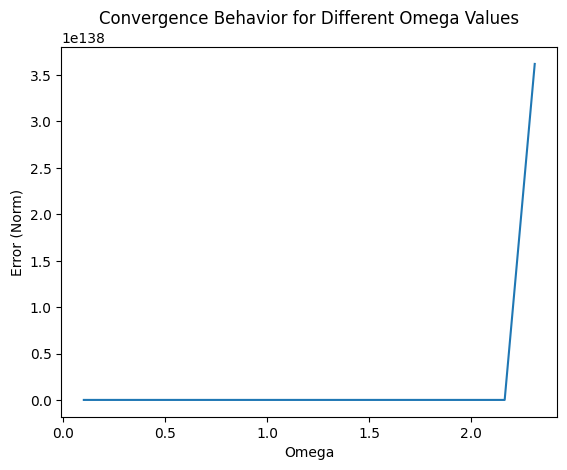

In [15]:
import numpy as np

def jacobi_solver(A, b, max_iterations=1000, tol=1e-6):
    n = len(b)
    x = np.zeros(n)
    D = np.diag(np.diag(A))
    inv_D = np.diag(1 / np.diag(D))
    R = np.eye(n) - np.dot(inv_D, A)
    f = np.dot(inv_D, b)
    for _ in range(max_iterations):
        x_new = np.dot(R, x) + f
        if np.linalg.norm(x_new - x) < tol:
            return x_new
        x = x_new
    return x

def gauss_seidel_solver(A, b, max_iterations=1000, tol=1e-6):
    n = len(b)
    x = np.zeros(n)
    L = np.tril(A)
    U = A - L
    inv_L = np.linalg.inv(L)
    R = np.dot(inv_L, U)
    f = np.dot(inv_L, b)
    for _ in range(max_iterations):
        x_new = np.dot(R, x) + f
        if np.linalg.norm(x_new - x) < tol:
            return x_new
        x = x_new
    return x

def sor_solver(A, b, omega, max_iterations=1000, tol=1e-6):
    n = len(b)
    x = np.zeros(n)
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    U = A - L - D
    inv_D_omega = np.linalg.inv(D + omega * L)
    R = np.dot(inv_D_omega, ((1 - omega) * D - omega * U))
    f = omega * np.dot(inv_D_omega, b)
    for _ in range(max_iterations):
        x_new = np.dot(R, x) + f
        if np.linalg.norm(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Example matrices
A1 = np.array([[4, 1, -1],
               [2, 7, 1],
               [1, -3, 12]])
b1 = np.array([3, 19, 31])

A2 = np.array([[10, -1, 2, 0],
               [-1, 11, -1, 3],
               [2, -1, 10, -1],
               [0, 3, -1, 8]])
b2 = np.array([6, 25, -11, 15])

A3 = np.array([[5, 2, 1],
               [2, 6, 2],
               [1, 2, 7]])
b3 = np.array([7, -8, 9])

# Comparison of convergence for different methods
jacobi_solution1 = jacobi_solver(A1, b1)
gauss_seidel_solution1 = gauss_seidel_solver(A1, b1)
sor_solution1 = sor_solver(A1, b1, omega=1.2)

print("Jacobi solution:", jacobi_solution1)
print("Gauss-Seidel solution:", gauss_seidel_solution1)
print("SOR solution (omega=1.2):", sor_solution1)

jacobi_solution2 = jacobi_solver(A2, b2)
gauss_seidel_solution2 = gauss_seidel_solver(A2, b2)
sor_solution2 = sor_solver(A2, b2, omega=1.2)

print("Jacobi solution:", jacobi_solution2)
print("Gauss-Seidel solution:", gauss_seidel_solution2)
print("SOR solution (omega=1.2):", sor_solution2)

jacobi_solution3 = jacobi_solver(A3, b3)
gauss_seidel_solution3 = gauss_seidel_solver(A3, b3)
sor_solution3 = sor_solver(A3, b3, omega=1.2)

print("Jacobi solution:", jacobi_solution3)
print("Gauss-Seidel solution:", gauss_seidel_solution3)
print("SOR solution (omega=1.2):", sor_solution3)

# Comparison of convergence for different omega values in SOR method
omegas = np.linspace(0.1, 2.9, 20)
errors = []
for omega in omegas:
    sor_solution = sor_solver(A3, b3, omega=omega)
    error = np.linalg.norm(sor_solution - jacobi_solution3)
    errors.append(error)

best_omega = omegas[np.argmin(errors)]
print("Best omega:", best_omega)

# Plotting the convergence behavior
import matplotlib.pyplot as plt

plt.plot(omegas, errors)
plt.xlabel('Omega')
plt.ylabel('Error (Norm)')
plt.title('Convergence Behavior for Different Omega Values')
plt.show()


## Porównanie rozwiązania za pomocą metody `solve` oraz z użyciem odwrotności na przykładzie macierzy źle uwarunkowanej

***Zadanie 5.***

Dany jest układ równań $Hx=b$.
* H jest macierzą Hilberta o wymiarach $n=5x5$ (I przypadek) i $n=15x15$ (II przypadek),
* b jest wektorem o następujących elementach $b_i = 1/(n + i + 1)$ Uwaga: $i=1,\dots,n$.

Do rozwiązania układu wykorzystaj dwa algorytmy:
1. Z odwracaniem macierzy współczynników H.
2. Metodę `numpy.linalg.solve`.

Porównaj błędy obu rozwiązań. Aby ocenić błąd możesz:
* wyznaczyć wektor residuum otrzymanego rozwiązania,
* rozwiązać układ równań z innym wektorem $b$. Załóż, że wektor rozwiązania ma wszystkie elementy (współrzędne) równe 1 ($u_i = 1, i = 1, 2, . . . , n$). Wtedy $b = Hu$. Układ rozwiążemy bez korzystania z wiedzy o postaci $u$. Dopiero wynik porównamy ze znanym nam $u$.

In [16]:
import numpy as np

def generate_H(n):
    """
    Funkcja generująca macierz Hilberta o wymiarach n x n.
    """
    return np.array([[1.0 / (i + j + 1) for j in range(n)] for i in range(n)])

def generate_b(n):
    """
    Funkcja generująca wektor b.
    """
    return np.array([1.0 / (n + i + 1) for i in range(n)])

def solve_with_matrix_inverse(H, b):
    """
    Rozwiązanie układu równań Hx = b przy użyciu odwracania macierzy H.
    """
    H_inv = np.linalg.inv(H)
    x = np.dot(H_inv, b)
    return x

def solve_with_numpy_solve(H, b):
    """
    Rozwiązanie układu równań Hx = b przy użyciu numpy.linalg.solve.
    """
    x = np.linalg.solve(H, b)
    return x

def calculate_residual_vector(H, x, b):
    """
    Obliczenie wektora residuum.
    """
    return np.dot(H, x) - b

def calculate_error(x, true_solution):
    """
    Obliczenie błędu względnego.
    """
    return np.linalg.norm(x - true_solution) / np.linalg.norm(true_solution)

# Wymiary macierzy Hilberta
n1 = 5
n2 = 15

# Generowanie macierzy Hilberta i wektora b dla obu przypadków
H1 = generate_H(n1)
b1 = generate_b(n1)
H2 = generate_H(n2)
b2 = generate_b(n2)

# Rozwiązanie układu równań dla obu przypadków przy użyciu odwracania macierzy i numpy.linalg.solve
x1_matrix_inv = solve_with_matrix_inverse(H1, b1)
x1_numpy_solve = solve_with_numpy_solve(H1, b1)
x2_matrix_inv = solve_with_matrix_inverse(H2, b2)
x2_numpy_solve = solve_with_numpy_solve(H2, b2)

# Obliczenie wektorów residuum dla obu przypadków
residual_vector1_matrix_inv = calculate_residual_vector(H1, x1_matrix_inv, b1)
residual_vector1_numpy_solve = calculate_residual_vector(H1, x1_numpy_solve, b1)
residual_vector2_matrix_inv = calculate_residual_vector(H2, x2_matrix_inv, b2)
residual_vector2_numpy_solve = calculate_residual_vector(H2, x2_numpy_solve, b2)

# Obliczenie błędów rozwiązania
error1_matrix_inv = calculate_error(x1_matrix_inv, np.ones(n1))
error1_numpy_solve = calculate_error(x1_numpy_solve, np.ones(n1))
error2_matrix_inv = calculate_error(x2_matrix_inv, np.ones(n2))
error2_numpy_solve = calculate_error(x2_numpy_solve, np.ones(n2))

print("Błąd rozwiązania dla pierwszego przypadku (n=5):")
print("Metoda odwracania macierzy H:", error1_matrix_inv)
print("Metoda numpy.linalg.solve:", error1_numpy_solve)
print("\nWektor residuum dla pierwszego przypadku (n=5):")
print("Metoda odwracania macierzy H:", residual_vector1_matrix_inv)
print("Metoda numpy.linalg.solve:", residual_vector1_numpy_solve)
print("\nBłąd rozwiązania dla drugiego przypadku (n=15):")
print("Metoda odwracania macierzy H:", error2_matrix_inv)
print("Metoda numpy.linalg.solve:", error2_numpy_solve)
print("\nWektor residuum dla drugiego przypadku (n=15):")
print("Metoda odwracania macierzy H:", residual_vector2_matrix_inv)
print("Metoda numpy.linalg.solve:", residual_vector2_numpy_solve)


Błąd rozwiązania dla pierwszego przypadku (n=5):
Metoda odwracania macierzy H: 1.7265480381451974
Metoda numpy.linalg.solve: 1.7265480381429748

Wektor residuum dla pierwszego przypadku (n=5):
Metoda odwracania macierzy H: [-3.13055137e-13 -3.34510197e-13 -2.82537882e-13 -2.40335529e-13
 -2.08513762e-13]
Metoda numpy.linalg.solve: [-5.55111512e-17  0.00000000e+00 -1.38777878e-17 -5.55111512e-17
  2.77555756e-17]

Błąd rozwiązania dla drugiego przypadku (n=15):
Metoda odwracania macierzy H: 10.927219094791715
Metoda numpy.linalg.solve: 5.031260826329516

Wektor residuum dla drugiego przypadku (n=15):
Metoda odwracania macierzy H: [-0.00679545 -0.06549692 -0.05817156 -0.04920867 -0.04247347 -0.03756217
 -0.03389053 -0.03105132 -0.02878378 -0.02692101 -0.02535396 -0.02400939
 -0.02283677 -0.02180025 -0.02087373]
Metoda numpy.linalg.solve: [-1.80411242e-16 -1.52655666e-16 -7.63278329e-17 -5.55111512e-17
 -1.87350135e-16 -3.26128013e-16  1.52655666e-16 -3.46944695e-17
 -1.59594560e-16 -2.15

**Zadanie domowe. Znaczenie wskaźnika uwarunkowania macierzy w szacowaniu błędu rozwiązania**


Dana jest następująca macierz A współczynników układu dwóch równań liniowy:
$$A=\begin{bmatrix}10^5 & 9.9\cdot10^4\\1.00001& 0.99\end{bmatrix}$$

Wektor prawej strony równania $Ax=b$ dla rozwiązania x = $[1, 1]^T$ możemy wyznaczyć z równości $b = Ax$.

Należy:
* obliczyć wskaźnik uwarunkowania macierzy $A$,
* rozwiązać układ równań $Ax = b$ (nie korzystając z wiedzy o przyjętym rozwiązaniu dokładnym x) korzystając z funkcji `np.linalg.solve`,
* ocenić błąd otrzymanego rozwiązania i porównać go z błędem szacowanym za pomocą wskaźnika uwarunkowania macierzy A,
* przeprowadzić skalowanie tak, aby macierz $A$ była wyważona wierszami,
* wyznaczyć nowe wartości wektora b tak, aby rozwiązanie dokładne się nie
zmieniło,
* obliczyć wskaźnik uwarunkowania macierzy skalowanej,
* rozwiązać układ równań tą samą metodą jak poprzednio,
* ocenić błąd otrzymanego rozwiązania i porównać go z błędem szacowanym za pomocą wskaźnika uwarunkowania skalowanej macierzy $A$.
1. Czy błąd numeryczny rozwiązania w obu przypadkach jest tego samego rzędu?
2. Które szacowanie błędu jest bardziej zbliżone do faktycznego błędu?